# Mini Project 1
**Student Name:** Shay-el Kalfa
**GitHub Link:** https://github.com/shayelkalfa/neuroscience-miniproject-1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the data
df = pd.read_csv("laptop_price - dataset.csv")

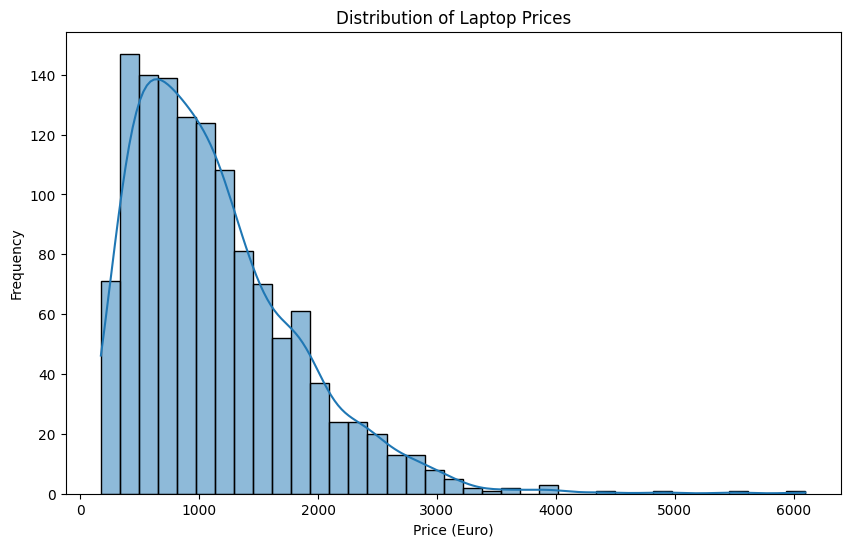

In [23]:
# Create the plot
plt.figure(figsize=(10, 6)) # Makes the plot bigger and easier to read
sns.histplot(df['Price (Euro)'], kde=True) # kde=True adds that smooth curve line

# Add labels 
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [24]:
# Calculate the average price per company
company_prices = df.groupby('Company')['Price (Euro)'].mean()

# Sort them (highest to lowest) to find the most expensive one easily
company_prices_sorted = company_prices.sort_values(ascending=False)

# Extract the top company name (the most "expensive" one)
top_company = company_prices_sorted.index[0]

print(f"The most expensive company is {top_company}")

# Print the full list with a title, rounded to 2 decimal places. (used some shenanigans for the headlines to appear properly, not really important.)
print("\nList of companies and their average prices:\n")
print(company_prices_sorted.round(2).reset_index().to_string(index=False))

The most expensive company is Razer

List of companies and their average prices:

  Company  Price (Euro)
    Razer       3346.14
       LG       2099.00
      MSI       1728.91
   Google       1677.67
Microsoft       1612.31
    Apple       1564.20
   Huawei       1424.00
  Samsung       1413.44
  Toshiba       1267.81
     Dell       1199.23
   Xiaomi       1133.46
     Asus       1123.83
   Lenovo       1093.86
       HP       1080.31
  Fujitsu        729.00
     Acer        633.46
    Chuwi        314.30
 Mediacom        295.00
     Vero        217.42


In [25]:
# Define a function to categorize the OS
def categorize_os(os_name):
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name or 'macOS' in os_name:
        return 'Mac'
    else:
        return os_name

# Apply this function to the 'OpSys' column
df['OpSys'] = df['OpSys'].apply(categorize_os)

# Check the results
print("operating systems:")
print(df['OpSys'].unique())

operating systems:
['Mac' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


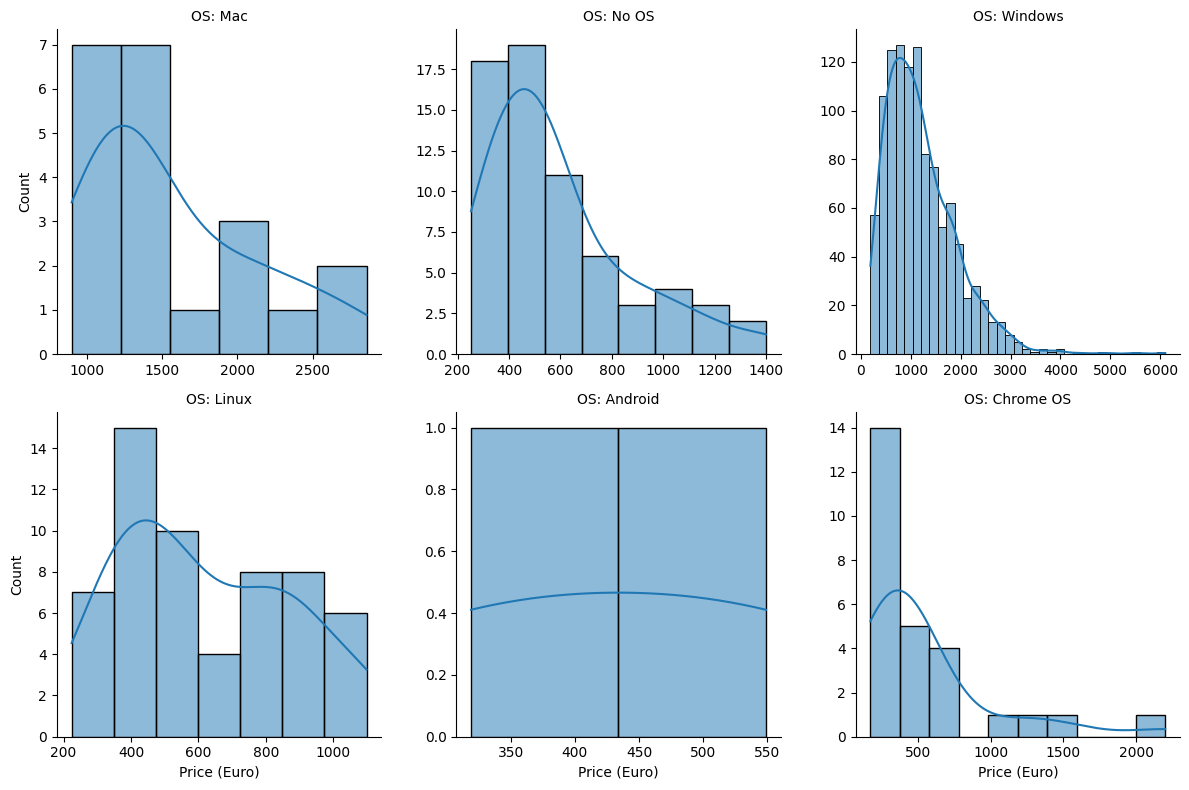

In [26]:
# Create a grid of plots, wrapping every 3 plots to a new line
g = sns.FacetGrid(df, col="OpSys", col_wrap=3, height=4, sharex=False, sharey=False)

# Map a histogram to each space in the grid
g.map(sns.histplot, "Price (Euro)", kde=True)

# Add labels 
g.set_axis_labels("Price (Euro)", "Count")
g.set_titles("OS: {col_name}")

# Show the plot
plt.show()

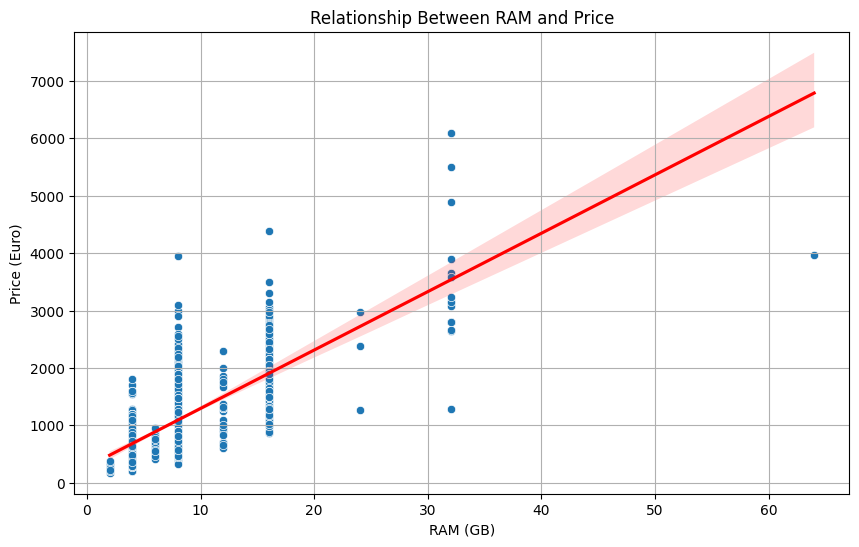

Standard Deviation of Residuals: €471.11
Statistical Threshold: +/- €942.22
Number of outliers found: 54

--- The Statistical Outliers ---
     Company            TypeName  RAM (GB)  Price (Euro)    Deviation
17     Apple           Ultrabook        16       2858.00   953.798396
196    Razer              Gaming        32       6099.00  2566.624093
204     Dell         Workstation        16       3055.00  1150.798396
226     Dell            Notebook        16        859.01 -1045.191604
235     Dell            Notebook        16        899.00 -1005.201604
247     Asus              Gaming        16       2999.00  1094.798396
249    Apple           Ultrabook         8       2040.00   949.885547
297     Dell         Workstation        16       2884.86   980.658396
385   Lenovo           Ultrabook         8       2282.00  1191.885547
388     Dell         Workstation         8       2135.00  1044.885547
398     Dell         Workstation         8       2712.00  1621.885547
456     Dell         

In [30]:
"""We generally expect that more RAM = higher price. A Scatter Plot is the best way to show this correlation."""

# Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)')

# Add a trend line to show the direction
sns.regplot(data=df, x='RAM (GB)', y='Price (Euro)', scatter=False, color='red')

plt.title("Relationship Between RAM and Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.grid(True) # Adds a grid to make reading values easier
plt.show()

"""an outlier is a data point that differs significantly from other observations (either strong & cheap or weak & expensive).
In a normal distribution, 95% of all data points fall within 2 Standard Deviations of the trend line.
Any laptop whose price is more than 2 Standard Deviations away from the predicted price is statistically an outlier."""

# Calculate the Trend Line 
m, b = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)

# Calculate the "Deviation" 
df['Expected_Price'] = (df['RAM (GB)'] * m) + b
df['Deviation'] = df['Price (Euro)'] - df['Expected_Price']

# Calculate the Threshold (2 Standard Deviations)
residual_std = df['Deviation'].std()
limit = 2 * residual_std

# Filter for specific rows that exceed the limit
stat_outliers = df[ abs(df['Deviation']) > limit ]

print(f"Standard Deviation of Residuals: €{residual_std:.2f}")
print(f"Statistical Threshold: +/- €{limit:.2f}")
print(f"Number of outliers found: {len(stat_outliers)}")
print("\n--- The Statistical Outliers ---")
print(stat_outliers[['Company', 'TypeName', 'RAM (GB)', 'Price (Euro)', 'Deviation']])


In [34]:
# Use Regex to replace the size patterns (like '128GB' or '1TB') with an empty string
# r'\d+\.?\d*\s*[GT]B' looks for digits, optional decimals, followed by GB or TB
df['Storage type'] = df['Storage type'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Clean up the messy leftovers (like extra spaces or the '+' sign if you want)
# This removes leading/trailing whitespace
df['Storage type'] = df['Storage type'].str.strip()

# Check the results
print(df[['Memory', 'Storage type']].head(10))

                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
5            500GB HDD            HDD
6  256GB Flash Storage  Flash Storage
7  256GB Flash Storage  Flash Storage
8            512GB SSD            SSD
9            256GB SSD            SSD
